### Questions Uncover wants to answer
- Age group that is mostly interested in products
- Location of the customer
- skincare challenges facing potential clients
- customer painpoints
- primary source of skincare
- how the company can provide information
- knowledge of kbeauty
- where customer sources skincare products
- source of marketing information
- most trusted skincare influencers
- where they purchase skincare
- priority list in skincare

In [113]:
# importing relevant modules

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# !pip install nltk
# ! pip install wordcloud

import nltk

from wordcloud import WordCloud, STOPWORDS


In [52]:
df = pd.read_excel("uncover_nigeria.xlsx")
pd.set_option('display.max_columns', None)
df.head()

,Timestamp,Tell us which describes you best!\n[Female ],Tell us which describes you best!\n[Male],What statement is most relevant to your residential status?,"If you answered that you currently live in Nigeria, what city do you reside?",What is your primary skincare concern? Check all that apply,"Where you live, what are your biggest pain points for skincare? Check all that apply",Thanks for sharing your pain points. We are working hard to build something for you. Tell us anything you want about your skincare journey and what you are looking for!,My primary source of skincare product is (check all that apply)?,Select the primary way you would love Uncover skincare experts to provide you advice?,Have you heard of Korean skincare also known as K-beauty?,Where do you hear of the Skincare products you end up buying?,Who is your go to or most trusted skincare influencer(s)? Please put their names below.,Do you believe in following a 3- or 4- step skincare routine?,Check all the things you do regularly to your face,"If you buy your skincare products in Nigeria, which sellers (online and offline) do you currently buy your skincare products from?",Please provide the names of the online or offline stores where you purchase your skincare products IN Nigeria (Please insert N/A if this does not apply to you).,Please provide the names of the online or offline stores where you purchase your skincare products OUTSIDE of Nigeria (Please insert N/A if this does not apply to you).,"If you don't mind, how much do you spend per month on skincare products?","Of the list below, what is your highest priority?","Of the list below, what is your second highest priority?","Of the list below, what is your third priority?",Thank you for taking the time to fill in this survey. We would love to keep you as part of our growing community. Please provide your email address to stay tuned with upcoming launch.,Click here to join our community of bad-ass women like yourself.\n\nInstagram Handle: @uncoverskincareco
0,2022-05-12 09:46:14,25-34,NaN,Nigerian living in Nigeria,Lagos,"Oily skin, Dry skin","Safety, Knowledge / Information",Th,I buy from physical stores in Nigeria. For exa...,Video - YouTube,"No, I have never heard of K-beauty",Social media,Powede Awujo,"Yes, but I don't have the discipline to follow...","Cleanse, Exfoliate",Supermarket,NaN,NaN,"Under N5,000",Body Care,Hair Care,Facial Skincare,afa@gmail.com,Option 1
1,2022-05-12 10:49:35,25-34,NaN,Nigerian living in Nigeria,Lagos,Acne-caused scarring or hyperpigmentation (dar...,"Choice, Price, Knowledge / Information",Visibility and less swapping of products becau...,I buy from physical stores in Nigeria. For exa...,Podcast,"Yes, I've used K-beauty products a few times","Own online research, In store browsing / teste...","_Skincareobsessed_ , myskin_doctrine , cecil v...","Yes, I already follow more than a 4-step skinc...","Cleanse, Exfoliate, Moisturise, Sunscreen","Pharmacy, Supermarket, I don't buy my skincare...",Ebaeno supermarket,"ASOS,","N25,001 - N45,000",Body Care,Facial Skincare,Hair Care,topazeazz90@gmail.com,Option 1
2,2022-05-12 10:58:26,25-34,NaN,Nigerian living in Nigeria,Edo,"Acne, Acne-caused scarring or hyperpigmentatio...",Price,Price convenient and efficient,I buy from physical stores in Nigeria. For exa...,Video - YouTube,"No, I have never heard of K-beauty","Recommendations from friends / family, Social ...",Is skin care,"No, I do not but I could be interested to find...","Cleanse, Treatment cream / serum (acne, pigmen...","Health, Beauty or cosmetic shop",NaN,NaN,"Under N5,000",Body Care,Facial Skincare,Hair Care,theresaaisosa@gmail.com,Option 1
3,2022-05-12 11:08:32,NaN,25-34,Nigerian living in Nigeria,Abuja,Oily skin,Knowledge / Information,Not looking for anything really,I buy from physical stores in Nigeria. For exa...,"Written via blog post, email, social media cap...","No, I have never heard of K-beauty",Recommendations from friends / family,maryfrancess,"No, I do not but I

### Data Cleaning

In [53]:
# dropping irrelevant columns

df.drop(["Timestamp", "Thank you for taking the time to fill in this survey. We would love to keep you as part of our growing community. Please provide your email address to stay tuned with upcoming launch.", "Click here to join our community of bad-ass women like yourself.\n\nInstagram Handle: @uncoverskincareco"], axis=1, inplace=True)

In [54]:
df.head(1)

,Tell us which describes you best!\n[Female ],Tell us which describes you best!\n[Male],What statement is most relevant to your residential status?,"If you answered that you currently live in Nigeria, what city do you reside?",What is your primary skincare concern? Check all that apply,"Where you live, what are your biggest pain points for skincare? Check all that apply",Thanks for sharing your pain points. We are working hard to build something for you. Tell us anything you want about your skincare journey and what you are looking for!,My primary source of skincare product is (check all that apply)?,Select the primary way you would love Uncover skincare experts to provide you advice?,Have you heard of Korean skincare also known as K-beauty?,Where do you hear of the Skincare products you end up buying?,Who is your go to or most trusted skincare influencer(s)? Please put their names below.,Do you believe in following a 3- or 4- step skincare routine?,Check all the things you do regularly to your face,"If you buy your skincare products in Nigeria, which sellers (online and offline) do you currently buy your skincare products from?",Please provide the names of the online or offline stores where you purchase your skincare products IN Nigeria (Please insert N/A if this does not apply to you).,Please provide the names of the online or offline stores where you purchase your skincare products OUTSIDE of Nigeria (Please insert N/A if this does not apply to you).,"If you don't mind, how much do you spend per month on skincare products?","Of the list below, what is your highest priority?","Of the list below, what is your second highest priority?","Of the list below, what is your third priority?"
0,25-34,NaN,Nigerian living in Nigeria,Lagos,"Oily skin, Dry skin","Safety, Knowledge / Information",Th,I buy from physical stores in Nigeria. For exa...,Video - YouTube,"No, I have never heard of K-beauty",Social media,Powede Awujo,"Yes, but I don't have the discipline to follow...","Cleanse, Exfoliate",Supermarket,NaN,NaN,"Under N5,000",Body Care,Hair Care,Facial Skincare


In [55]:
# renaming columns

dict = {"Tell us which describes you best!\n[Female ]": "Age_Female",
       "Tell us which describes you best!\n[Male]": "Age_Male",
       "What statement is most relevant to your residential status?": "residential_status",
       "If you answered that you currently live in Nigeria, what city do you reside?": "city",
       "What is your primary skincare concern? Check all that apply": "skincare_concern",
       "Where you live, what are your biggest pain points for skincare? Check all that apply": "skincare_painpoints",
       "Thanks for sharing your pain points. We are working hard to build something for you. Tell us anything you want about your skincare journey and what you are looking for!":"skincare_expectations",
       "My primary source of skincare product is (check all that apply)?":"primary_source",
       "Select the primary way you would love Uncover skincare experts to provide you advice?": "expected_source_of_advice",
      "Have you heard of Korean skincare also known as K-beauty?": "kbeauty_familiarization",
       "Where do you hear of the Skincare products you end up buying?": "source_of_skincare_information",
       "Who is your go to or most trusted skincare influencer(s)? Please put their names below.":"trusted_influencer",
       "Do you believe in following a 3- or 4- step skincare routine?":"skincareroutine_beliefs",
      "Check all the things you do regularly to your face": "skincare_routine",
       "If you buy your skincare products in Nigeria, which sellers (online and offline) do you currently buy your skincare products from?": "sellers",
       "Please provide the names of the online or offline stores where you purchase your skincare products IN Nigeria (Please insert N/A if this does not apply to you).":"sellers_in_nigeria",
       "Please provide the names of the online or offline stores where you purchase your skincare products OUTSIDE of Nigeria (Please insert N/A if this does not apply to you).": "sellers_outof_nigeria",
       "If you don't mind, how much do you spend per month on skincare products?":"monthlybudget",
       "Of the list below, what is your highest priority?": "highest_priority",
       "Of the list below, what is your second highest priority?": "second_highest_priority",
       "Of the list below, what is your third priority?": "third_priority"}

df.rename(columns=dict, inplace=True)

In [56]:
df.head()

,Age_Female,Age_Male,residential_status,city,skincare_concern,skincare_painpoints,skincare_expectations,primary_source,expected_source_of_advice,kbeauty_familiarization,source_of_skincare_information,trusted_influencer,skincareroutine_beliefs,skincare_routine,sellers,sellers_in_nigeria,sellers_outof_nigeria,monthlybudget,highest_priority,second_highest_priority,third_priority
0,25-34,NaN,Nigerian living in Nigeria,Lagos,"Oily skin, Dry skin","Safety, Knowledge / Information",Th,I buy from physical stores in Nigeria. For exa...,Video - YouTube,"No, I have never heard of K-beauty",Social media,Powede Awujo,"Yes, but I don't have the discipline to follow...","Cleanse, Exfoliate",Supermarket,NaN,NaN,"Under N5,000",Body Care,Hair Care,Facial Skincare
1,25-34,NaN,Nigerian living in Nigeria,Lagos,Acne-caused scarring or hyperpigmentation (dar...,"Choice, Price, Knowledge / Information",Visibility and less swapping of products becau...,I buy from physical stores in Nigeria. For exa...,Podcast,"Yes, I've used K-beauty products a few times","Own online research, In store browsing / teste...","_Skincareobsessed_ , myskin_doctrine , cecil v...","Yes, I already follow more than a 4-step skinc...","Cleanse, Exfoliate, Moisturise, Sunscreen","Pharmacy, Supermarket, I don't buy my skincare...",Ebaeno supermarket,"ASOS,","N25,001 - N45,000",Body Care,Facial Skincare,Hair Care
2,25-34,NaN,Nigerian living in Nigeria,Edo,"Acne, Acne-caused scarring or hyperpigmentatio...",Price,Price convenient and efficient,I buy from physical stores in Nigeria. For exa...,Video - YouTube,"No, I have never heard of K-beauty","Recommendations from friends / family, Social ...",Is skin care,"No, I do not but I could be interested to find...","Cleanse, Treatment cream / serum (acne, pigmen...","Health, Beauty or cosmetic shop",NaN,NaN,"Under N5,000",Body Care,Facial Skincare,Hair Care
3,NaN,25-34,Nigerian living in Nigeria,Abuja,Oily skin,Knowledge / Information,Not looking for anything really,I buy from physical stores in Nigeria. For exa...,"Written via blog post, email, social media cap...","No, I have never heard of K-beauty",Recommendations from friends / family,maryfrancess,"No, I do not but I could be interested to find...",Cleanse,Supermarket,Nil,nil,"Under N5,000",Body Care,Hair Care,Facial Skincare
4,18-24,NaN,Nigerian living in Nigeria,Lagos,Acne-caused scarring or hyperpigmentation (dar...,"Erratic availability, Price",I want something for Africans: sunscreen and s...,I buy from online stores in Nigeria. For examp...,"Written via blog post, email, social media cap...","Yes, but I have never used K-beauty products","Recommendations from friends / family, Social ...",myskin_doctrine,"Yes, but I don't have the discipline to follow...","Cleanse, Treatment cream / serum (acne, pigmen...","Supermarket, Health, Beauty or cosmetic shop","Prince Ebeano Supermarket, Danglife","ASOS, PRETTY LITTLE THING, Bondisands","N5,001 - N10,000",Facial Skincare,Make-up,Body Care


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1066 entries, 0 to 1065
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age_Female                      609 non-null    object
 1   Age_Male                        275 non-null    object
 2   residential_status              1066 non-null   object
 3   city                            1066 non-null   object
 4   skincare_concern                1066 non-null   object
 5   skincare_painpoints             1066 non-null   object
 6   skincare_expectations           555 non-null    object
 7   primary_source                  1066 non-null   object
 8   expected_source_of_advice       1066 non-null   object
 9   kbeauty_familiarization         1066 non-null   object
 10  source_of_skincare_information  1066 non-null   object
 11  trusted_influencer              1017 non-null   object
 12  skincareroutine_beliefs         1066 non-null   

In [58]:
duplicates = df[df.duplicated()]
duplicates

,Age_Female,Age_Male,residential_status,city,skincare_concern,skincare_painpoints,skincare_expectations,primary_source,expected_source_of_advice,kbeauty_familiarization,source_of_skincare_information,trusted_influencer,skincareroutine_beliefs,skincare_routine,sellers,sellers_in_nigeria,sellers_outof_nigeria,monthlybudget,highest_priority,second_highest_priority,third_priority
872,NaN,25-34,Nigerian living in Nigeria,Lagos,Dry skin,Knowledge / Information,GOOD SKIN,I buy from physical stores in Nigeria. For exa...,"Written via blog post, email, social media cap...","No, I have never heard of K-beauty",Recommendations from friends / family,NIL,"No, I do not but I could be interested to find...",Cleanse,Supermarket,NaN,NaN,"Under N5,000",Body Care,Facial Skincare,Hair Care


In [59]:
# checking for null values

df.isna().sum()

Age_Female                        457
Age_Male                          791
residential_status                  0
city                                0
skincare_concern                    0
skincare_painpoints                 0
skincare_expectations             511
primary_source                      0
expected_source_of_advice           0
kbeauty_familiarization             0
source_of_skincare_information      0
trusted_influencer                 49
skincareroutine_beliefs             0
skincare_routine                    0
sellers                             0
sellers_in_nigeria                349
sellers_outof_nigeria             888
monthlybudget                       0
highest_priority                    0
second_highest_priority             0
third_priority                      0
dtype: int64

### EDA

#### Most popular age group for marketing

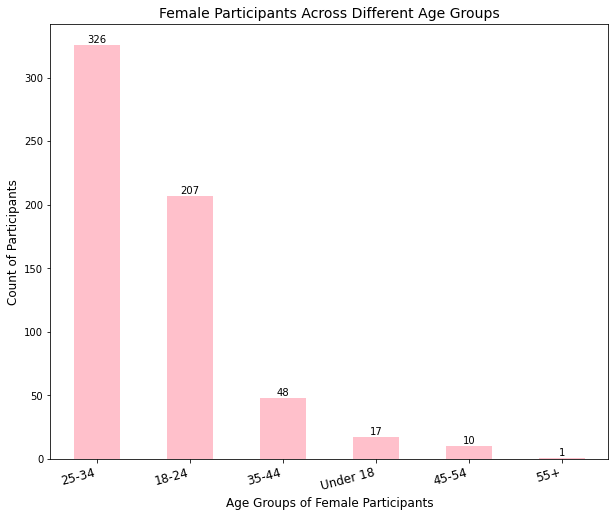

In [140]:
ax = df["Age_Female"].value_counts().plot(kind="bar", figsize= (10,8), color = "pink")
plt.xlabel("Age Groups of Female Participants", size=12)
plt.ylabel("Count of Participants", size=12)
plt.title("Female Participants Across Different Age Groups", size=14)
plt.xticks(size=12, rotation = 15, ha="right")

ax.bar_label(ax.containers[0], label_type='edge')

plt.savefig("Femaleagegroups.jpg")

- The age group of 25-34 comprised the largest proportion of participants (326) and 18-24, the second largest group (207). This could be because these are the largest Instagram and Whatsapp users or perhaps are the ones more interested in skincare in this market. 
- These two groups are potentially the age groups that Uncover can target with their products and market to. The 55+ group was the smallest group.

- Perhaps Uncover needs more respondents from this group and can find them through other platforms asides from Instagram and Whatsapp. Most older groups might not use Instagram. There is the potential of reaching out to this group through other platforms.
- The 35-44 group and under 18 group are potential groups that should not be ignored.

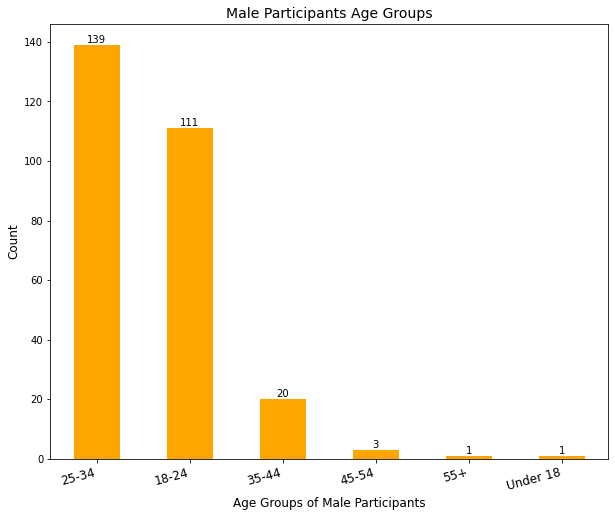

In [143]:
ax = df["Age_Male"].value_counts().plot(kind="bar", figsize= (10,8), color = "orange")
plt.xlabel("Age Groups of Male Participants", size=12)
plt.ylabel("Count", size=12)
plt.title("Male Participants Age Groups", size=14)

ax.bar_label(ax.containers[0], label_type='edge')
plt.xticks(size=12, rotation = 15, ha="right")

plt.savefig("maleagegroups.jpg")

Similar to the female group, the largest two groups for male participants are those in the 25-34 group and 18-24 group. The same assumptions apply, perhaps these two groups are the biggest social media users.

#### Location Identity of Most Participants

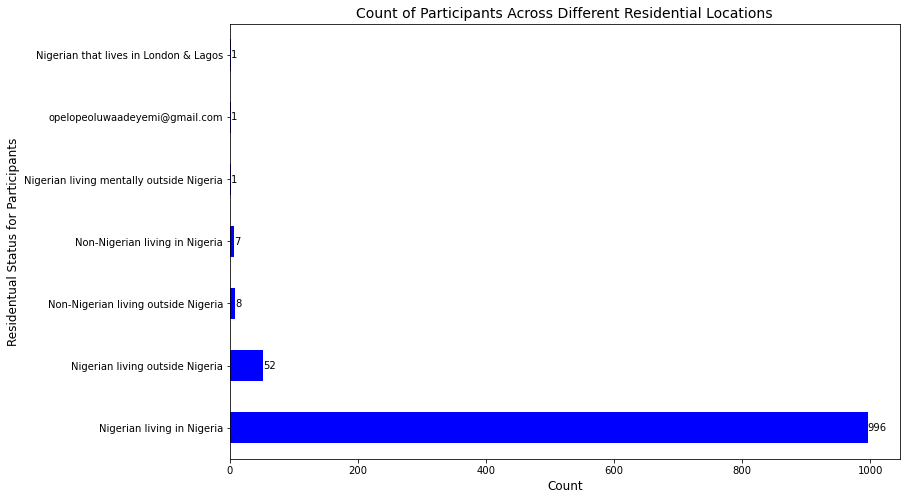

In [145]:
ax = df["residential_status"].value_counts().plot(kind="barh", figsize= (12,8), color = "blue")
plt.ylabel("Residentual Status for Participants", size=12)
plt.xlabel("Count", size=12)
plt.title("Count of Participants Across Different Residential Locations", size=14)

ax.bar_label(ax.containers[0], label_type='edge')

plt.savefig("residences.jpg")

Uncover is a brand made for Africans and therefore is Africans-centered. The participants were mainly Nigerians who live in Nigeria.
There is the potential for influencing nigerians living outside Nigeria by expanding data collection in the next survey to those
outside the country.

In [149]:
df['city'].mask(df['city'] == 'edo', 'Edo', inplace=True)
df['city'].mask(df['city'] == 'lagos', 'Lagos', inplace=True)

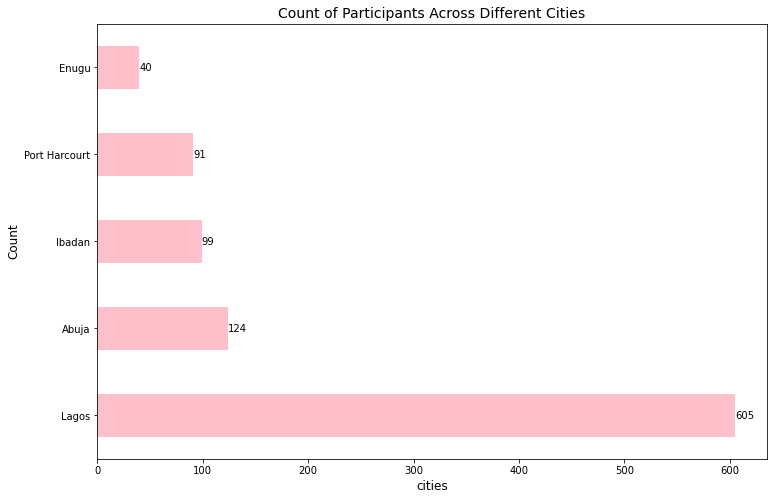

In [155]:
cities = df.groupby("city")["city"].count().sort_values(ascending=False).head(5)

ax = cities.plot(kind="barh", figsize= (12,8), color = "pink")


plt.xlabel("cities", size=12)
plt.ylabel("Count", size=12)
plt.title("Count of Participants Across Different Cities", size=14)

ax.bar_label(ax.containers[0], label_type='edge')

plt.savefig("cities.jpg")

Lagos, Abuja, Ibadan and Port Harcourt comprised the cities with the largest respondents which represents skin enthusiasts. Uncover has the potential for focusing
marketing and distribution across this cities.

#### Where participants purchase products

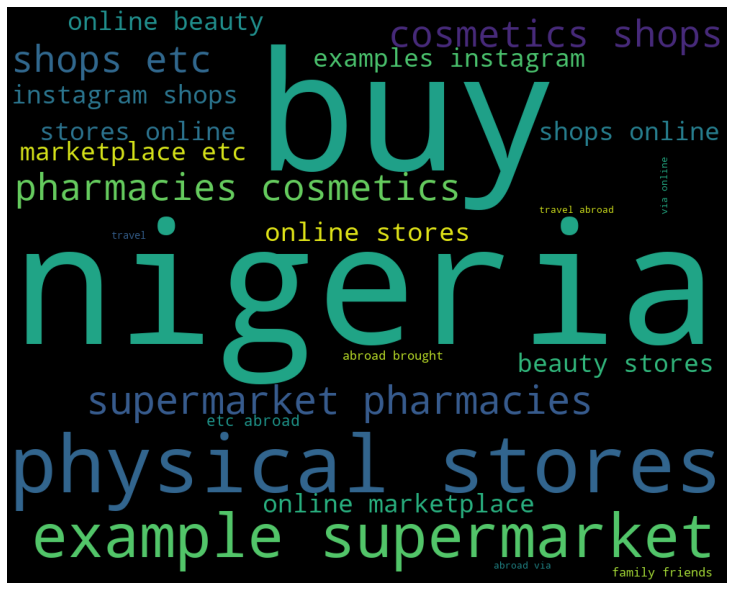

In [157]:
# Plot a word cloud 

nltk.download('stopwords', quiet=True)
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df["primary_source"]:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 1000, height = 800,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (15, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show() 

There is the potential for Uncover choosing to distribute and sell their products in physical stores in Nigeria such as
supermarkets, beauty stores and pharmacies mainly and online stores secondly as these are the biggest sources of skincare products.

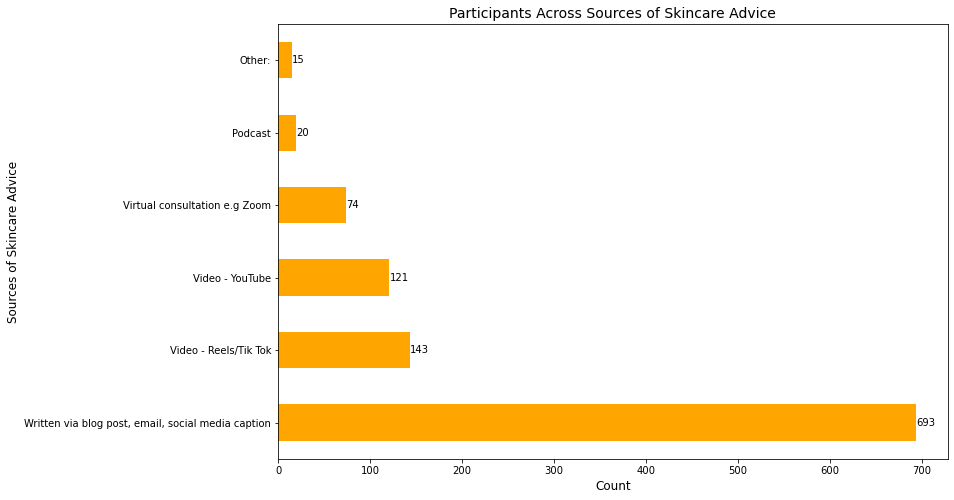

In [161]:
ax = df["expected_source_of_advice"].value_counts().plot(kind="barh", figsize= (12,8), color = "orange")
plt.ylabel("Sources of Skincare Advice", size=12)
plt.xlabel("Count", size=12)
plt.title("Participants Across Sources of Skincare Advice", size=14)

# plt.xticks(size=12, rotation = 15, ha="right")

ax.bar_label(ax.containers[0], label_type='edge')

plt.savefig("sources of advice.jpg")

It is evident that participants would like to receive information on skincare through either blog, social media posts, emails
and also through video reels on either Instagram or TikTok. Uncover should invest in these forms of communication to effectively
interact with their clients and potential customers.

#### Trusted Influencer

In [66]:
df.groupby("trusted_influencer")["trusted_influencer"].count().sort_values(ascending=False).head(10)

trusted_influencer
Nil              120
NIL               95
nil               85
None              55
none              32
nancy isime       24
Maraji            24
bimbo ademoye     20
Omowunmi Dada     19
tomike adeoye     16
Name: trusted_influencer, dtype: int64

In [67]:
# creating uniformity with the null values

df['trusted_influencer'].mask(df['trusted_influencer'] == 'Nil', 'None', inplace=True)
df['trusted_influencer'].mask(df['trusted_influencer'] == 'NIL', 'None', inplace=True)
df['trusted_influencer'].mask(df['trusted_influencer'] == 'nil', 'None', inplace=True)
df['trusted_influencer'].mask(df['trusted_influencer'] == 'none', 'None', inplace=True)
df['trusted_influencer'].mask(df['trusted_influencer'] == 'No one', 'None', inplace=True)

In [68]:
df.groupby("trusted_influencer")["trusted_influencer"].count().sort_values(ascending=False).head(10)

trusted_influencer
None             396
Maraji            24
nancy isime       24
bimbo ademoye     20
Omowunmi Dada     19
tomike adeoye     16
iyabo ojo         15
Nengi             13
Uriel              9
Huda               9
Name: trusted_influencer, dtype: int64

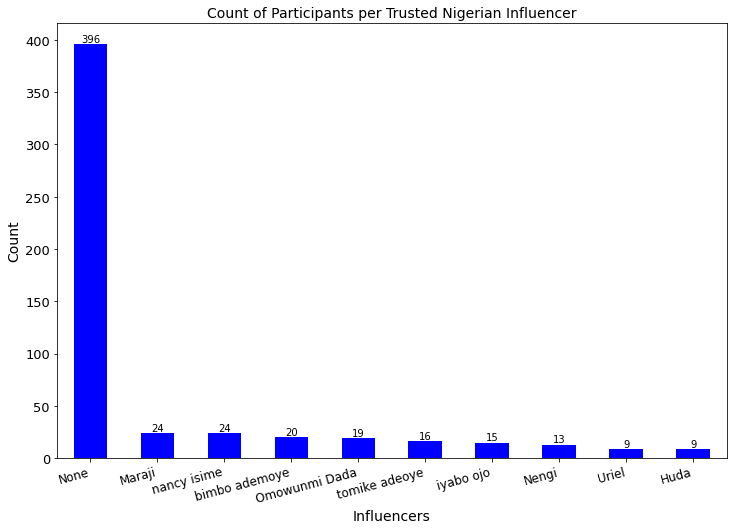

In [162]:
top_influencers = df.groupby("trusted_influencer")["trusted_influencer"].count().sort_values(ascending=False).head(10)

ax = top_influencers.plot(kind='bar', figsize=(12,8), color="blue", fontsize=13)
plt.xlabel("Influencers", size=14)
plt.ylabel("Count", size=14)
plt.title("Count of Participants per Trusted Nigerian Influencer", size=14)

plt.xticks(size=12, rotation = 15, ha="right")

ax.bar_label(ax.containers[0], label_type='edge')

plt.savefig("Influencers.jpg")

Most of the respondents are not attached to any influencer and therefore gives Uncover the opportunity to partner up with influencers 
who align with their values and goals. This can include smaller influencers who might not be too expensive to partner up with.

However, Uncover should consider Maraji (1.4million followers), Nancy Iseme (4.8million followers), 
Bimbo ademoye (2.3million followers) and Omowunmi Dada (324k followers). All these influencers are in the age group 25-34 years.
Perhaps partnering with an older influencer in a different age group might help introduce Uncover to a different market. Laura Ikeji or Iyabo Ojo are such influencers in the age group of 35-44 which can expand the brand's market.

#### skincare concerns

#### skincare expectations

In [73]:
df['skincare_expectations'].mask(df['skincare_expectations'] == 'GOOD SKIN', 'Good Skin', inplace=True)
df['skincare_expectations'].mask(df['skincare_expectations'] == 'good skin', 'Good Skin', inplace=True)
df['skincare_expectations'].mask(df['skincare_expectations'] == 'beautiful skin', 'Good Skin', inplace=True)
df['skincare_expectations'].mask(df['skincare_expectations'] == 'CLEAR SKIN', 'Good Skin', inplace=True)
df['skincare_expectations'].mask(df['skincare_expectations'] == 'Clear Skin', 'Good Skin', inplace=True)
df['skincare_expectations'].mask(df['skincare_expectations'] == 'FINE SKIN', 'Good Skin', inplace=True)
df['skincare_expectations'].mask(df['skincare_expectations'] == 'Good skin', 'Good Skin', inplace=True)
df['skincare_expectations'].mask(df['skincare_expectations'] == 'nice skin', 'Good Skin', inplace=True)
df['skincare_expectations'].mask(df['skincare_expectations'] == 'Clear skin', 'Good Skin', inplace=True)
df['skincare_expectations'].mask(df['skincare_expectations'] == 'Affordable', 'Affordability', inplace=True)
df['skincare_expectations'].mask(df['skincare_expectations'] == 'something that simply works.', 'something that simply works', inplace=True)

#### Sellers

Text(0.5, 1.0, 'Top Ten Sellers')

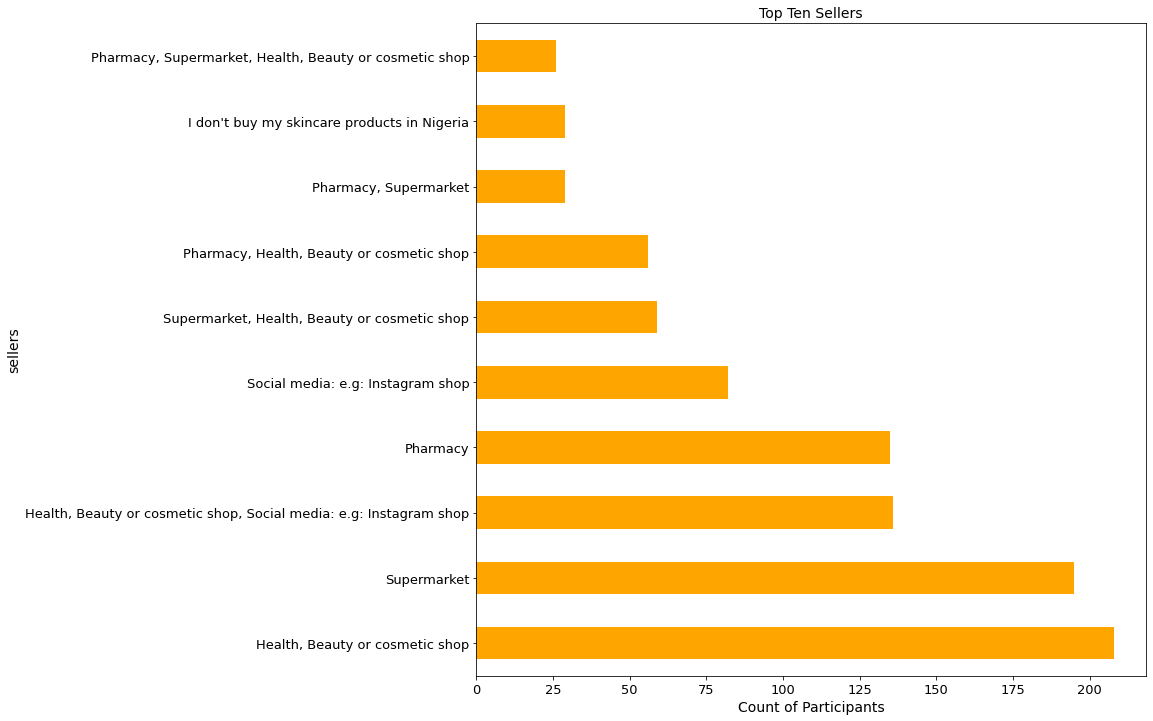

In [75]:
top_expectations = df.groupby("sellers")["sellers"].count().sort_values(ascending=False).head(10)
top_expectations.plot(kind='barh', figsize=(12,12), color="orange", fontsize=13)
plt.ylabel("sellers", size=14)
plt.xlabel("Count of Participants", size=14)
plt.title("Top Ten Sellers", size=14)

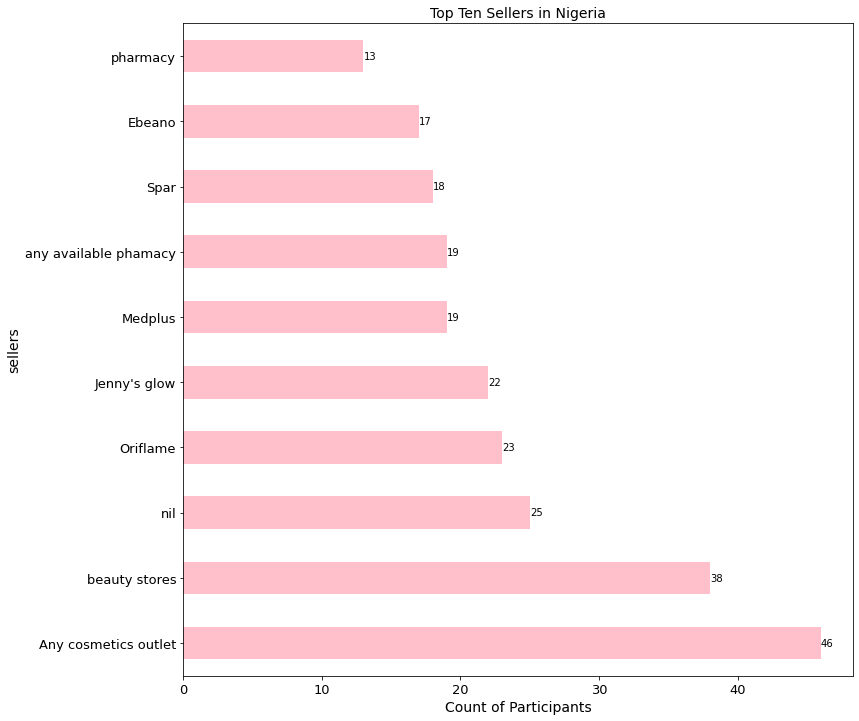

In [163]:
top_expectations = df.groupby("sellers_in_nigeria")["sellers_in_nigeria"].count().sort_values(ascending=False).head(10)
ax = top_expectations.plot(kind='barh', figsize=(12,12), color="pink", fontsize=13)
plt.ylabel("sellers", size=14)
plt.xlabel("Count of Participants", size=14)
plt.title("Top Ten Sellers in Nigeria", size=14)

ax.bar_label(ax.containers[0], label_type='edge')

plt.savefig("TOPNigerianSellers.jpg")

Within Nigeria, the top sellers of skincare products are cosmetic outlets, beauty stores, oriflame and Jenny's glow. 
25 of the respondents do not purchase from within the country.

In [77]:
# creating uniformity with the null values

df['sellers_outof_nigeria'].mask(df['sellers_outof_nigeria'] == 'N/a', 'None', inplace=True)
df['sellers_outof_nigeria'].mask(df['sellers_outof_nigeria'] == 'nil', 'None', inplace=True)
df['sellers_outof_nigeria'].mask(df['sellers_outof_nigeria'] == 'na', 'None', inplace=True)
df['sellers_outof_nigeria'].mask(df['sellers_outof_nigeria'] == 'n/a.', 'None', inplace=True)
df['sellers_outof_nigeria'].mask(df['sellers_outof_nigeria'] == 'Na', 'None', inplace=True)
df['sellers_outof_nigeria'].mask(df['sellers_outof_nigeria'] == '-', 'None', inplace=True)
df['sellers_outof_nigeria'].mask(df['sellers_outof_nigeria'] == 'Non', 'None', inplace=True)
df['sellers_outof_nigeria'].mask(df['sellers_outof_nigeria'] == 'N\A', 'None', inplace=True)
df['sellers_outof_nigeria'].mask(df['sellers_outof_nigeria'] == 'NIL', 'None', inplace=True)
df['sellers_outof_nigeria'].mask(df['sellers_outof_nigeria'] == 'Na', 'None', inplace=True)
df['sellers_outof_nigeria'].mask(df['sellers_outof_nigeria'] == 'No', 'None', inplace=True)
df['sellers_outof_nigeria'].mask(df['sellers_outof_nigeria'] == 'No answer', 'None', inplace=True)
df['sellers_outof_nigeria'].mask(df['sellers_outof_nigeria'] == 'Nil', 'None', inplace=True)

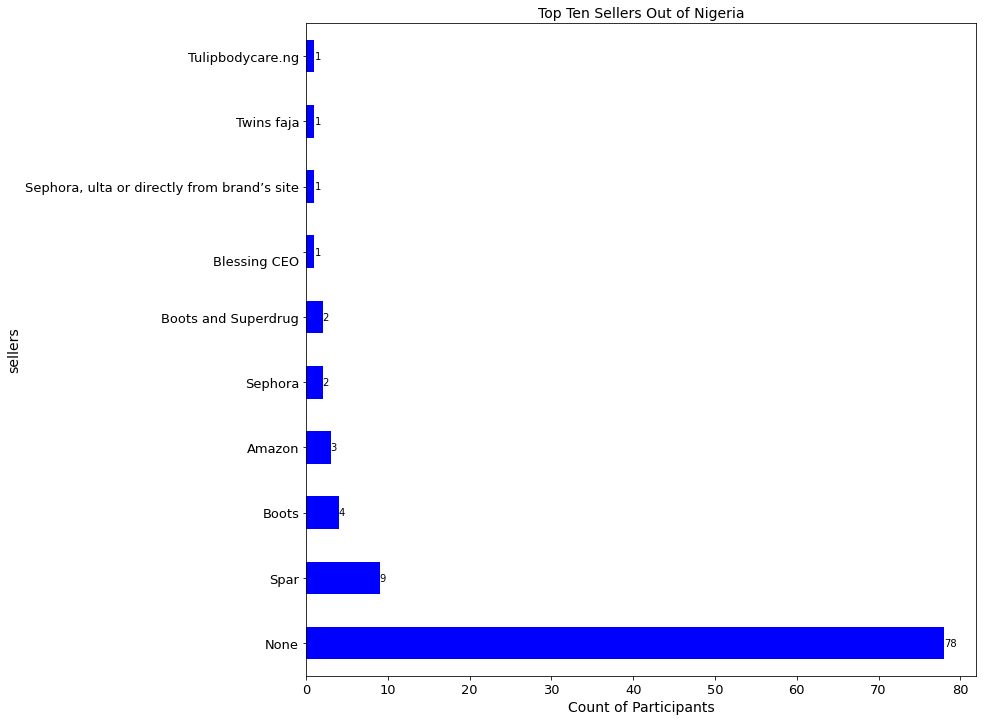

In [164]:
top_sellers = df.groupby("sellers_outof_nigeria")["sellers_outof_nigeria"].count().sort_values(ascending=False).head(10)
ax = top_sellers.plot(kind='barh', figsize=(12,12), color="blue", fontsize=13)
plt.ylabel("sellers", size=14)
plt.xlabel("Count of Participants", size=14)
plt.title("Top Ten Sellers Out of Nigeria", size=14)

ax.bar_label(ax.containers[0], label_type='edge')

plt.savefig("TOPoutofNigerianSellers.jpg")

Most of the participants do not purchase from stores outside Nigeria. This might not be an immediate investment for Uncover. Uncover
needs to focus on stores within the country.

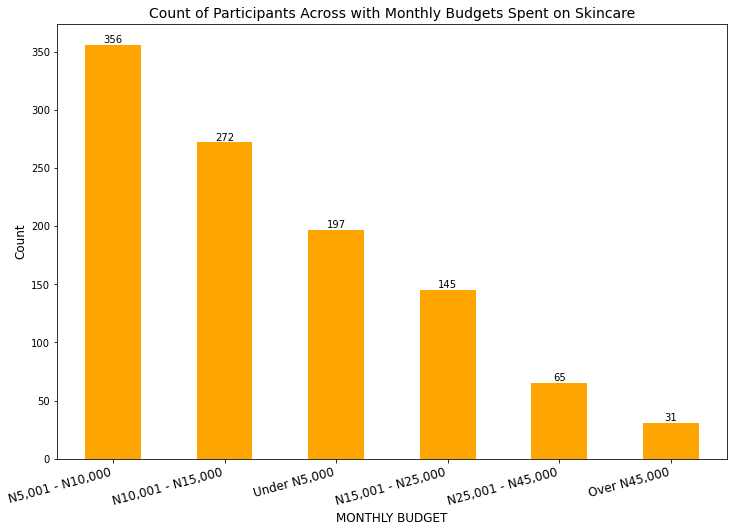

In [166]:
ax = df["monthlybudget"].value_counts().plot(kind="bar", figsize= (12,8), color = "orange")
plt.xlabel("MONTHLY BUDGET", size=12)
plt.ylabel("Count", size=12)
plt.title("Count of Participants Across with Monthly Budgets Spent on Skincare", size=14)

plt.xticks(size=12, rotation = 15, ha="right")
ax.bar_label(ax.containers[0], label_type='edge')

plt.savefig("monthlybudget.jpg")

Most participants are willing to spend between 5000 and 10000 Naira on skincare which is between 11 and 22 dollars.The next group are will to
spend upto 15,000 Naira which is equivalent to almost 33 dollars. This shows that the market is looking for affordable skincare.
To ensure that Uncover captures the market, they have to price their products between 11 and 33 dollars as over 55 dollars will
lead to lower sales.

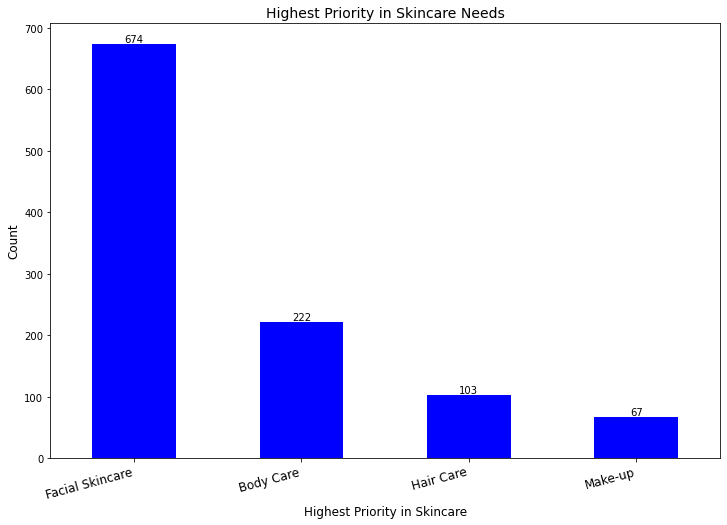

In [168]:
ax = df["highest_priority"].value_counts().plot(kind="bar", figsize= (12,8), color = "blue")
plt.xlabel("Highest Priority in Skincare", size=12)
plt.ylabel("Count", size=12)
plt.title("Highest Priority in Skincare Needs", size=14)

plt.xticks(size=12, rotation = 15, ha="right")
ax.bar_label(ax.containers[0], label_type='edge')

plt.savefig("highestpriority.jpg")

674 respondents have facial skincare as their first priority. Which means that Uncover needs to mainly focus on producing and
distributing facial skincare products.

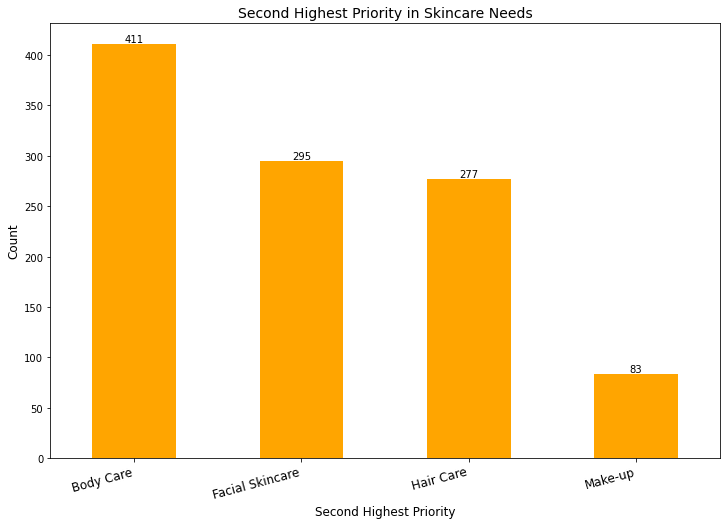

In [169]:
ax = df["second_highest_priority"].value_counts().plot(kind="bar", figsize= (12,8), color = "orange")
plt.xlabel("Second Highest Priority", size=12)
plt.ylabel("Count", size=12)
plt.title("Second Highest Priority in Skincare Needs", size=14)

plt.xticks(size=12, rotation = 15, ha="right")
ax.bar_label(ax.containers[0], label_type='edge')

plt.savefig("secondhighestpriority.jpg")

Second priority is body care. This gives insight to Uncover on future products. Once the company has capitalized on facial products,
they can produce bodycare products.

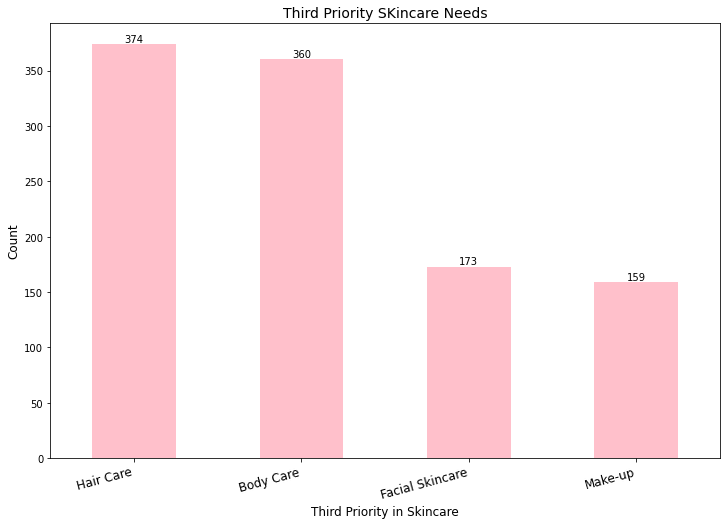

In [170]:
ax = df["third_priority"].value_counts().plot(kind="bar", figsize= (12,8), color = "pink")
plt.xlabel("Third Priority in Skincare", size=12)
plt.ylabel("Count", size=12)
plt.title("Third Priority SKincare Needs", size=14)

plt.xticks(size=12, rotation = 15, ha="right")
ax.bar_label(ax.containers[0], label_type='edge')

plt.savefig("thirdpriority.jpg")

Haircare is the third priority product that the market is interested in. Therefore, body care and haircare are the two types of
products that the market is interested in.

In [84]:
# creating a wordcloud
df.head()

,Age_Female,Age_Male,residential_status,city,skincare_concern,skincare_painpoints,skincare_expectations,primary_source,expected_source_of_advice,kbeauty_familiarization,source_of_skincare_information,trusted_influencer,skincareroutine_beliefs,skincare_routine,sellers,sellers_in_nigeria,sellers_outof_nigeria,monthlybudget,highest_priority,second_highest_priority,third_priority
0,25-34,NaN,Nigerian living in Nigeria,Lagos,"Oily skin, Dry skin","Safety, Knowledge / Information",Th,I buy from physical stores in Nigeria. For exa...,Video - YouTube,"No, I have never heard of K-beauty",Social media,Powede Awujo,"Yes, but I don't have the discipline to follow...","Cleanse, Exfoliate",Supermarket,NaN,NaN,"Under N5,000",Body Care,Hair Care,Facial Skincare
1,25-34,NaN,Nigerian living in Nigeria,Lagos,Acne-caused scarring or hyperpigmentation (dar...,"Choice, Price, Knowledge / Information",Visibility and less swapping of products becau...,I buy from physical stores in Nigeria. For exa...,Podcast,"Yes, I've used K-beauty products a few times","Own online research, In store browsing / teste...","_Skincareobsessed_ , myskin_doctrine , cecil v...","Yes, I already follow more than a 4-step skinc...","Cleanse, Exfoliate, Moisturise, Sunscreen","Pharmacy, Supermarket, I don't buy my skincare...",Ebaeno supermarket,"ASOS,","N25,001 - N45,000",Body Care,Facial Skincare,Hair Care
2,25-34,NaN,Nigerian living in Nigeria,Edo,"Acne, Acne-caused scarring or hyperpigmentatio...",Price,Price convenient and efficient,I buy from physical stores in Nigeria. For exa...,Video - YouTube,"No, I have never heard of K-beauty","Recommendations from friends / family, Social ...",Is skin care,"No, I do not but I could be interested to find...","Cleanse, Treatment cream / serum (acne, pigmen...","Health, Beauty or cosmetic shop",NaN,NaN,"Under N5,000",Body Care,Facial Skincare,Hair Care
3,NaN,25-34,Nigerian living in Nigeria,Abuja,Oily skin,Knowledge / Information,Not looking for anything really,I buy from physical stores in Nigeria. For exa...,"Written via blog post, email, social media cap...","No, I have never heard of K-beauty",Recommendations from friends / family,maryfrancess,"No, I do not but I could be interested to find...",Cleanse,Supermarket,Nil,None,"Under N5,000",Body Care,Hair Care,Facial Skincare
4,18-24,NaN,Nigerian living in Nigeria,Lagos,Acne-caused scarring or hyperpigmentation (dar...,"Erratic availability, Price",I want something for Africans: sunscreen and s...,I buy from online stores in Nigeria. For examp...,"Written via blog post, email, social media cap...","Yes, but I have never used K-beauty products","Recommendations from friends / family, Social ...",myskin_doctrine,"Yes, but I don't have the discipline to follow...","Cleanse, Treatment cream / serum (acne, pigmen...","Supermarket, Health, Beauty or cosmetic shop","Prince Ebeano Supermarket, Danglife","ASOS, PRETTY LITTLE THING, Bondisands","N5,001 - N10,000",Facial Skincare,Make-up,Body Care


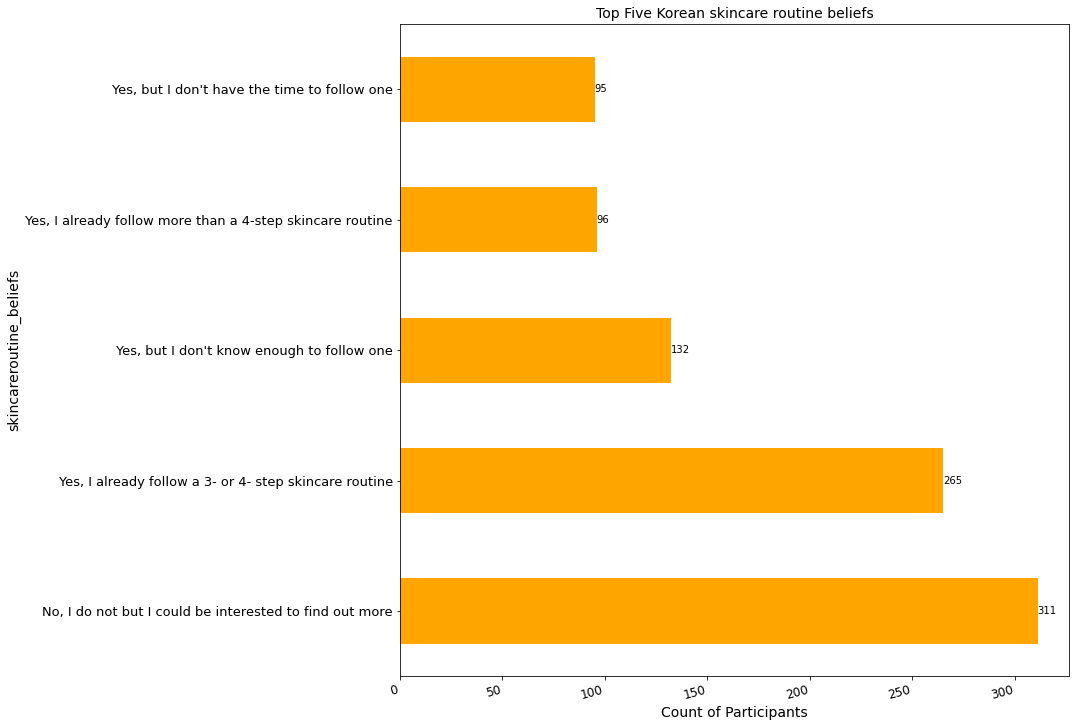

In [172]:
top_expectations = df.groupby("skincareroutine_beliefs")["skincareroutine_beliefs"].count().sort_values(ascending=False).head(5)
ax = top_expectations.plot(kind='barh', figsize=(12,12), color="orange", fontsize=13)
plt.ylabel("skincareroutine_beliefs", size=14)
plt.xlabel("Count of Participants", size=14)
plt.title("Top Five Korean skincare routine beliefs", size=14)

plt.xticks(size=12, rotation = 15, ha="right")
ax.bar_label(ax.containers[0], label_type='edge')

plt.savefig("beliefs.jpg")

Most participants do not know much about the korean skincare routine and could use education through blogs, social media posts and
videos.

#### skincare routines

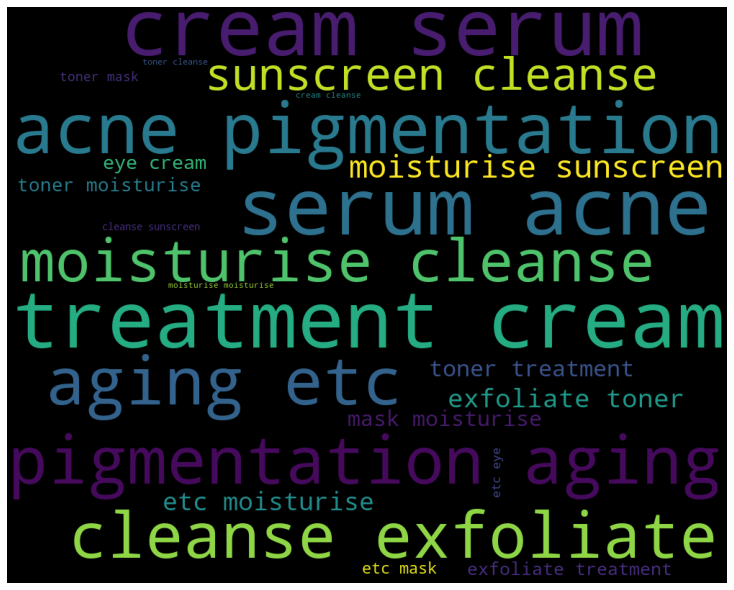

In [173]:
# Plot a word cloud 

nltk.download('stopwords', quiet=True)
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df["skincare_routine"]:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 1000, height = 800,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (15, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig("skincareroutine.png", format="png")
plt.show() 

The most common skincare routines for the participants include cleansing, exfoliating, treating acne, pigmentation, aging, using
serums and moisturizers. This means that the market is interested in cleansers, exfoliaters, acne treatments, anti-aging products,
and serums. To make profit, Uncover needs to focus on producing and distributing these products.

In [88]:
data = "df.xlsx"
df.to_excel(data)

#### Market skincare Painpoints

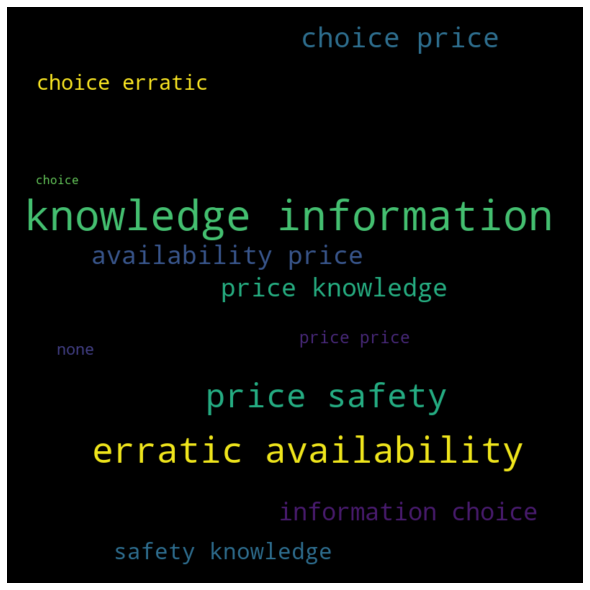

In [127]:
nltk.download('stopwords', quiet=True)
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df["skincare_painpoints"]:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 12).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (15, 8), facecolor = None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig("skincarepainpoints.png", format="png")
plt.savefig("skincarepainpoints.png", format="png")
plt.show() 

Some of the main challenges that participants have been facing in regards to skincare are lack of information on skincare, lack of
consistently available products, and lack of affordable products. Uncover has to provide consistent, reliable and effective 
information. Products they produce also need to be affordable and consistently available in stores that customers can access.

#### Primary skincare concerns

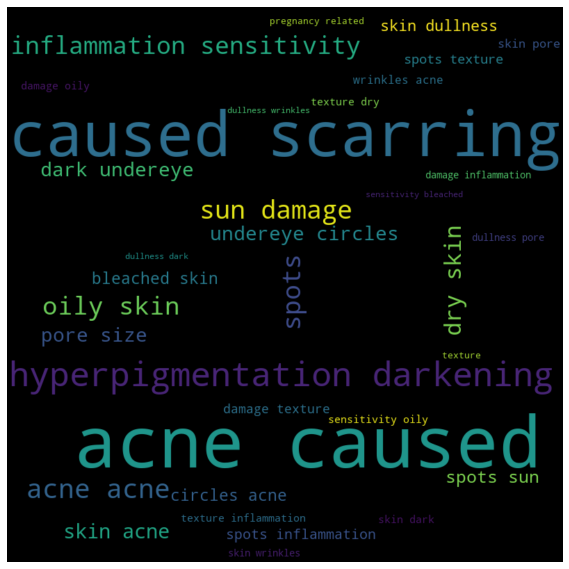

In [126]:
nltk.download('stopwords', quiet=True)
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df["skincare_concern"]:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 12).generate(comment_words)
 
# plot the WordCloud image   
plt.figure(figsize = (15, 8), facecolor = 'None')
plt.imshow(wordcloud, interpolation="bilinear")
plt.tight_layout(pad = 0)
plt.axis("off")
plt.savefig("skincareconcerns.png", format="png")
plt.show() 

Some of the primary skincare concerns for the participants are acne, scarring and spots, hyperpigmentation, sundamage and inflammation.

Some unique concerns in this market are bleached skin. This is an area that uncover can conduct more research on and manufacture
products that answer this problem.

#### Market skincare Expectations

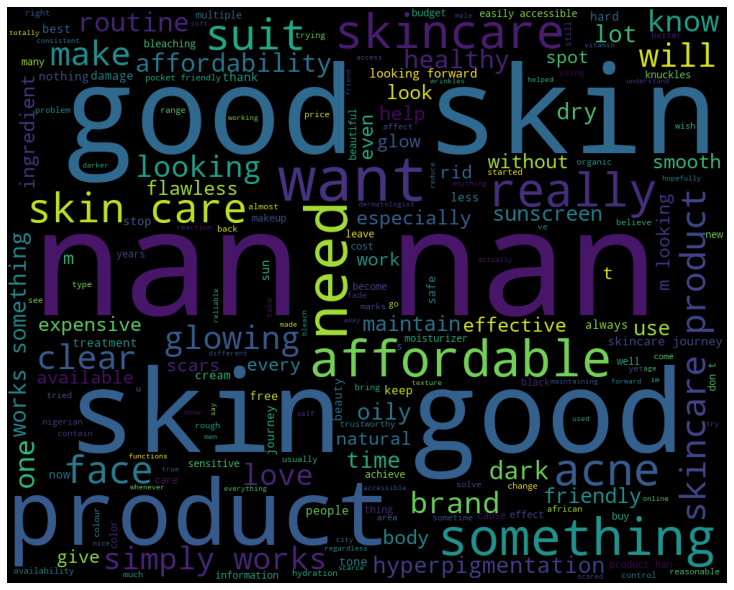

In [125]:
# Plot a word cloud 

nltk.download('stopwords', quiet=True)
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df["skincare_expectations"]:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 1000, height = 800,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (15, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig("skincareexpectations.png", format="png")
plt.show() 

The most common expectations from the participants are good, clean, and glowing skincare. Other aspects are affordability, hyperpigmentation, 
and easily available. Uncover needs to invest in products that help participants achieve good and clear skin, are affordable and tackle
hyperpigmentation.